In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets

import neural_net
import optimization
import performance

## Loading the data

In [2]:
def load_dataset():
    np.random.seed(3)
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
    # Visualize the data
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral)
    train_X = train_X.T
    train_Y = train_Y.reshape((1, train_Y.shape[0]))
    
    return train_X, train_Y

def plot_decision_boundary(clf, X, y):

    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.c_[xx.ravel(), yy.ravel()].T
    Z = clf.predict(Z)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plot_data(X.T, y.T.ravel())

def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=30, label="Cluster1")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=30, label="Cluster2")

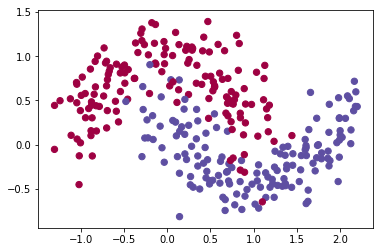

In [3]:
train_X, train_Y = load_dataset()

## Model with different initialization methods

**CONSTANTS DEFINING THE MODEL**

In [4]:
layers_dims = [train_X.shape[0], 5, 2, 1]
activations = ('relu', 'sigmoid')
lambd = 0
optimizer_name = 'adam'
learning_rate = 0.0007
num_epochs = 10000

### ZEROS INITIALIZATION

In [5]:
init_method = 'zeros'

In [6]:
clf = neural_net.MLNN(layers_dims, init_method, activations, lambd, optimizer_name, learning_rate, num_epochs)

In [7]:
clf.train(train_X, train_Y)

In [8]:
predictions = clf.predict(train_X)
zeros_accuracy = performance.compute_accuracy(train_Y, predictions)
print('Zeros initialization accuracy = ', zeros_accuracy, '%')

Zeros initialization accuracy =  50.0 %


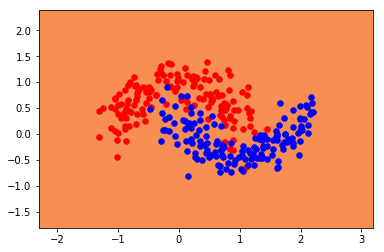

In [9]:
plot_decision_boundary(clf, train_X, train_Y)

Text(0.5, 1.0, 'Cost 100 per epoch')

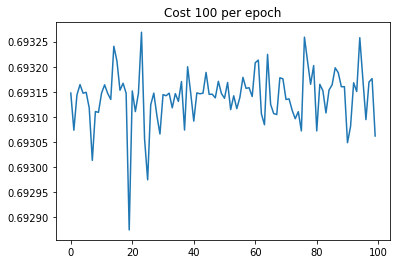

In [10]:
params = clf.get_params()
plt.plot(params['costs'])
plt.title('Cost 100 per epoch')

### RANDOM INITIALIZATION

In [11]:
init_method = 'random'

In [12]:
clf = neural_net.MLNN(layers_dims, init_method, activations, lambd, optimizer_name, learning_rate, num_epochs)

In [13]:
clf.train(train_X, train_Y)

In [14]:
predictions = clf.predict(train_X)
random_init_accuracy = performance.compute_accuracy(train_Y, predictions)
print('Random initialization accuracy = ', random_init_accuracy, '%')

Random initialization accuracy =  50.0 %


**GETTING THE MLNN PARAMS**

In [15]:
params = clf.get_params()

Text(0, 0.5, 'cost')

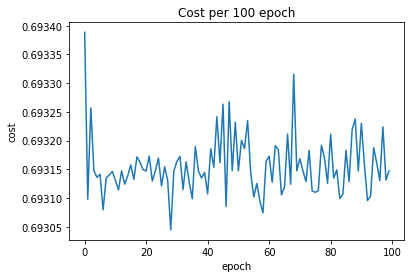

In [16]:
plt.plot(params['costs'])
plt.title('Cost per 100 epoch')
plt.xlabel('epoch')
plt.ylabel('cost')

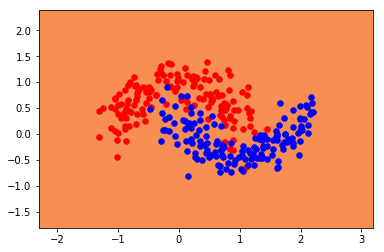

In [17]:
plot_decision_boundary(clf, train_X, train_Y)

### XAVIER INITIALIZATION

In [18]:
init_method = 'xavier'

In [19]:
clf = neural_net.MLNN(layers_dims, init_method, activations, lambd,
                      optimizer_name, learning_rate, num_epochs)

In [20]:
clf.train(train_X, train_Y)

In [21]:
predictions = clf.predict(train_X)
xavier_accuracy = performance.compute_accuracy(train_Y, predictions)
print('Xavier initialization accuracy = ', xavier_accuracy, '%')

Xavier initialization accuracy =  93.66666666666667 %


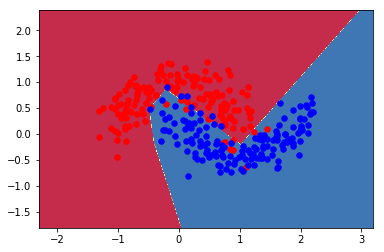

In [22]:
plot_decision_boundary(clf, train_X, train_Y)

Text(0.5, 1.0, 'Cost per 100 epoch')

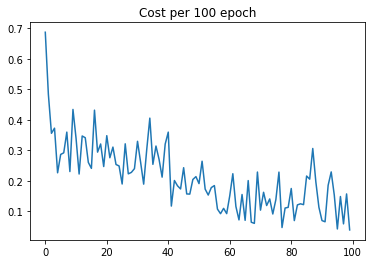

In [23]:
params = clf.get_params()
plt.plot(params['costs'])
plt.title('Cost per 100 epoch')

### HE-et-AL INITIALIZATION

In [24]:
init_method = 'he'

In [25]:
clf = neural_net.MLNN(layers_dims, init_method, activations, lambd, optimizer_name, learning_rate, num_epochs)

In [26]:
clf.train(train_X, train_Y)

In [30]:
predictions = clf.predict(train_X)
he_accuracy = performance.compute_accuracy(train_Y, predictions)
print('He-et-Al initialization accuracy = ', he_accuracy, '%')

He-et-Al initialization accuracy =  95.0 %


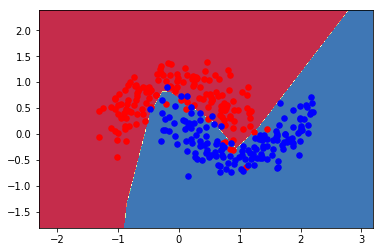

In [28]:
plot_decision_boundary(clf, train_X, train_Y)

Text(0.5, 1.0, 'Cost 100 per epoch')

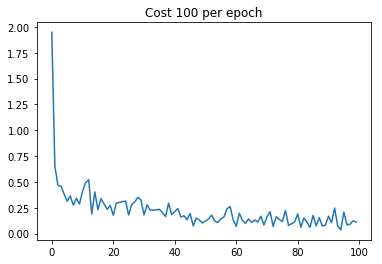

In [29]:
params = clf.get_params()
plt.plot(params['costs'])
plt.title('Cost 100 per epoch')

## Summary

<table> 
    <tr>
        <td>
            <b>initialization method</b>
        </td>
        <td>
        <b>accuracy</b>
        </td>
    </tr>
        <td>
        Zeros
        </td>
        <td>
        50%
        </td>
    <tr>
        <td>
        Random
        </td>
        <td>
        50%
        </td>
    </tr>
    <tr>
        <td>
        Xavier
        </td>
        <td>
        93.66%
        </td>
    </tr>
    <tr>
        <td>
        He-et-Al
        </td>
        <td>
        95%
        </td>
    </tr>
</table> 
